In [137]:
import numpy as np
from utils import get_lenet
from load_mnist import load_mnist
from scipy.io import loadmat
from conv_net import convnet_forward
from init_convnet import init_convnet
import matplotlib.pyplot as plt

In [138]:
# Load the model architecture
layers = get_lenet()
params = init_convnet(layers)

# Load the network
data = loadmat('../results/lenet.mat')
params_raw = data['params']

for params_idx in range(len(params)):
    raw_w = params_raw[0,params_idx][0,0][0]
    raw_b = params_raw[0,params_idx][0,0][1]
    assert params[params_idx]['w'].shape == raw_w.shape, 'weights do not have the same shape'
    assert params[params_idx]['b'].shape == raw_b.shape, 'biases do not have the same shape'
    params[params_idx]['w'] = raw_w
    params[params_idx]['b'] = raw_b

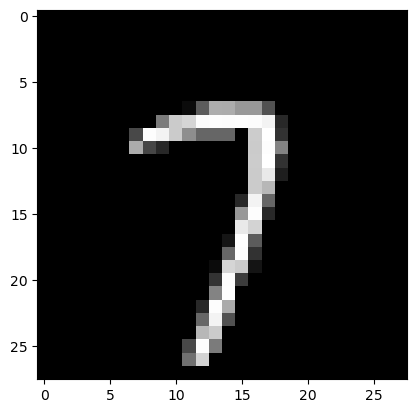

In [139]:
# Load data
fullset = False
xtrain, ytrain, xvalidate, yvalidate, xtest, ytest = load_mnist(fullset)
m_train = xtrain.shape[1]

batch_size = 1
layers[0]['batch_size'] = batch_size

img = xtest[:,0]
img = np.reshape(img, (28, 28), order='F')
plt.imshow(img.T, cmap='gray')
plt.show()

In [140]:
output = convnet_forward(params, layers, xtest[:,0:1])
output_1 = np.reshape(output[0]['data'], (28,28), order='F')

##### Fill in your code here to plot the features ######


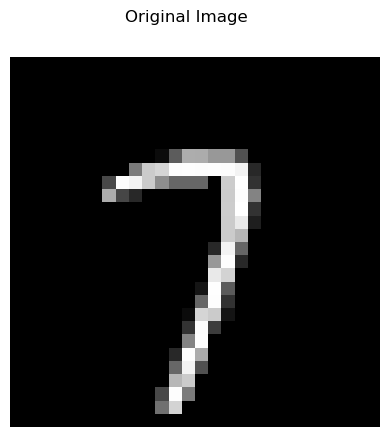

In [141]:
fig, ax = plt.subplots(1,1)
ax.imshow(output_1.T, cmap='gray')
ax.set_axis_off()

fig.suptitle('Original Image')
plt.savefig('../results/original_image.png')


In [142]:
def plot_layer_outputs(output, layer_idx, title, filename):
    fig, axes = plt.subplots(4, 5, figsize=(10, 8))
    data_size = output[layer_idx]['height'] * output[layer_idx]['width']
    start = 0

    # Loop through the 4x5 subplot grid
    for i, ax in enumerate(axes.flat):
        end = start + data_size
        # Extract and reshape image data
        img_data = output[layer_idx]['data'][start:end]
        img = np.reshape(img_data, (output[layer_idx]['height'], output[layer_idx]['width']), order='F')
        ax.imshow(img.T, cmap='gray')
        ax.set_axis_off()
        # Add a number label to each subplot
        ax.text(0.5, -0.1, str(i + 1), fontsize=12, color='black',
                ha='center', va='center', transform=ax.transAxes,
                )

        start = end

    # Add title and save the figure
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename)
    plt.close(fig)  # Close the figure to prevent display overlap

In [143]:
# Plot and save outputs from the second and third layers
plot_layer_outputs(output, layer_idx=1, title="Convolution Layer 2", filename='../results/second_layer.png')


In [144]:
plot_layer_outputs(output, layer_idx=2, title="ReLU Layer 3", filename='../results/third_layer.png')